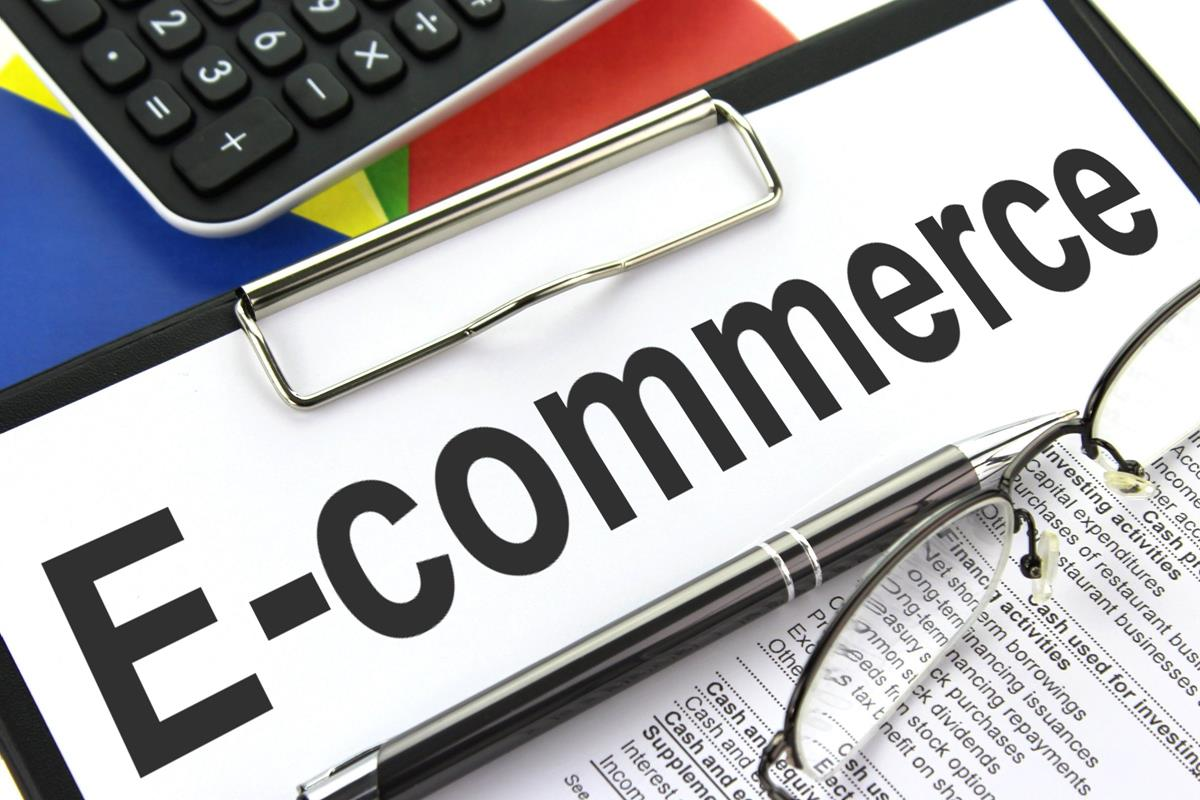

In [1]:
from IPython.display import Image
Image(filename='e-commerce.jpg',width=500, height=200)

# E-commerce: Investir em app ou site?

## Introdução

Uma empresa de comércio eletrônico com sede na cidade de Nova York vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site a roupa que desejam.

## Objetivo

A empresa precisa decidir se deve concentrar seus esforços e investimentos em aplicativos móveis ou em seu site a fim de aumentar a quantia gasta pelos clientes. 

#### Obs.: Os emails são falsos!

## Importando bibliotecas/ módulos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Info sobre os dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.
* Yearly Amount Spent: Quantia anual gasto

** Lendo o dataset dos com informações dos clientes: **

In [3]:
clientes = pd.read_csv("Ecommerce_Customers")

** Visão geral do dataset: **

In [4]:
clientes.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [5]:
clientes.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


*** O dataset a ser trabalhado possui 500 registros e 8 campos com informações de cada cliente!***

## Análise de dados exploratória
___
** Usando o seaborn para criar um jointplot para comparar as colunas Time On Website e Quantia gasta anualmente para ver se há alguma correlação entre os dados.**

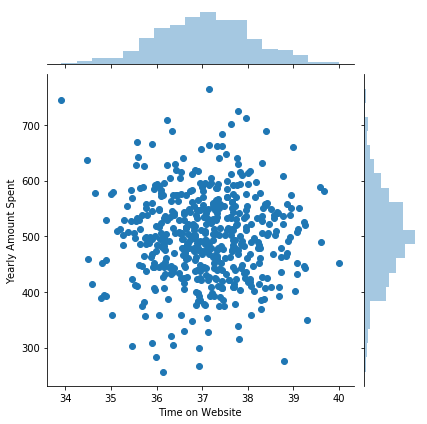

In [5]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

** Agora usando os dados de tempo no app (Time on App) **

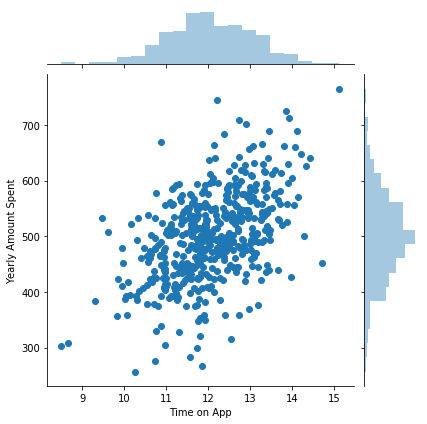

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

** O tempo gasto em app parece ter uma tendência maior do que o tempo em website.**

** Explorando os tipos de relações em todo o conjunto de dados.**

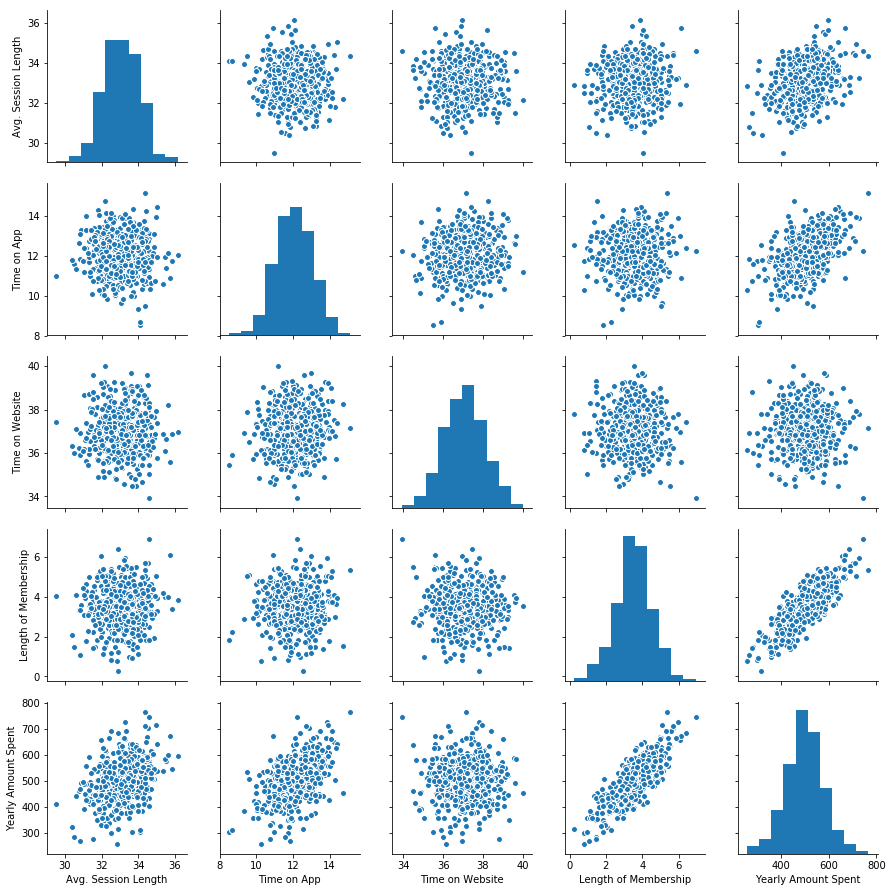

In [10]:
sns.pairplot(clientes)

** Baseado neste plot a que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent) é o tempo de membro de cada cliente (Length of Membership). Mas o tempo médio de sessão, tempo em app tbm parecem ter uma certa relação. Então utilizaremos essas 4 informações para ver quem estaria mais relacionada com gasto de cada cliente e onde deve-se ter mais investimento. **

** Criando um plot de um modelo linear da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership). **

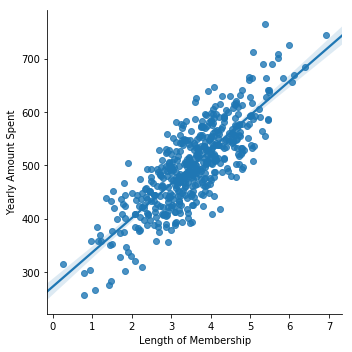

In [11]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

** Com esse resultado já podemos ver que o tempo de associação está correlacionado como a quantia gasta pelos clientes.**

# Agora vamos para a construção do Modelo

## Treinando e testando os dados

O primeiro passo é dividir os dados em conjuntos de treinamento e teste.

** Definindo as uma variáveis: X = todas as características numéricas dos clientes e Y = Valor anual gasto (Yearly Amount Spent). **

In [14]:
y = clientes['Yearly Amount Spent']

In [15]:
X= clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [16]:
# Importando scikit-learn para dividir os dados em conjunto de treinamento e conjunto de teste.
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.3,random_state=101)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

In [18]:
# Importando o LinearRegression do sklearn.linear_model
from sklearn.linear_model import LinearRegression

** Criando uma instância de um modelo LinearRegression () chamado lm. **

In [19]:
lm = LinearRegression()

** Treinando lm nos dados de treinamento. **

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Resultado dos coeficientes do modelo**

In [21]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!


In [22]:
# Usando o lm.predict() para prever o conjunto X_test dos dados.
prediction = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

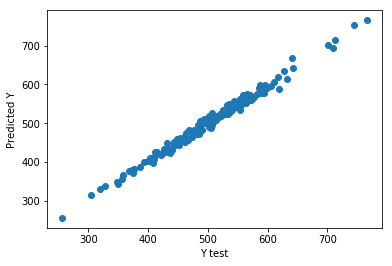

In [25]:
# Agora criamos um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos 
# para ver se o modelo está fazendo uma boa predição.

plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

** Como podemos ver os valores preditos e os de teste estão bem relacionados, mostrando que estamos no caminho certo com nosso modelo.**

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas **

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


## Resíduos

Pelos resultados podemos ver que obtivemos um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os dados.

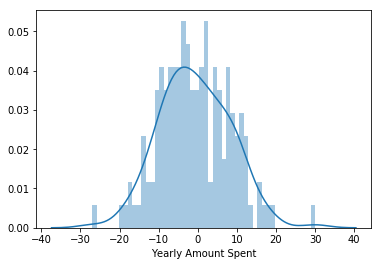

In [26]:
# Criando um histograma dos resíduos e certificando-se de que ele parece normalmente distribuído. 
sns.distplot((y_test-prediction), bins=50)

## Conclusão

In [27]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

Coefs
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097

** Interpretando os coeficientes: **

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de **25,98 dólares** totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de **38,59 dólares** totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de **0,19 dólares** totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de **61,27 dólares** totais gastos.

***Diante dos resultados obtidos, podemos ver que a empresa, primeiramente, deveria arranjar outras formas de fidelizar seu cliente, já que essa é a variável que mais ifluenciam nos gastos dos seus usuários. Entre site e aplicativo, a empresa deve investir em aplicavo, dado que o mesmo apresenta um coeficiente significativamente maior do que o site. ***